ROOT MEAN SQUARE PROPAGATION

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

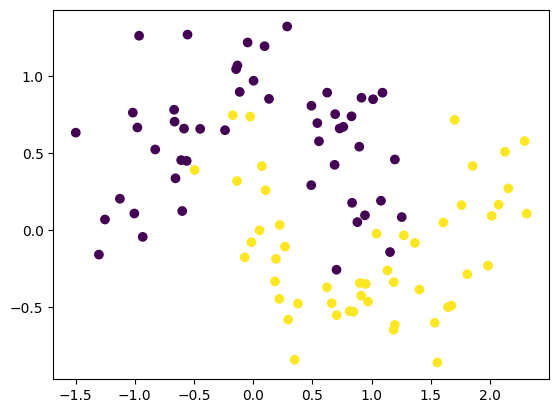

In [42]:
X,y=make_moons(100,noise=0.25,random_state=2)
plt.scatter(X[:,0],X[:,1],c=y)
p=pd.DataFrame(X,y)


In [43]:
model=Sequential()
model.add(Dense(3,activation='relu',input_dim=2,kernel_regularizer=l2(.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=l2(.01)))



In [44]:
optimizer=RMSprop(learning_rate=.001,rho=0.85)
model.compile(optimizer=optimizer,loss='binary_crossentropy')


In [45]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [46]:
history=model.fit(X,y,epochs=3000,validation_split=.2,batch_size=32,callbacks=callback)

Epoch 1/3000
3/3 [==============================] - 1s 101ms/step - loss: 1.0650 - val_loss: 0.8251
Epoch 2/3000
3/3 [==============================] - 0s 20ms/step - loss: 0.9135 - val_loss: 0.8226
Epoch 3/3000
3/3 [==============================] - 0s 57ms/step - loss: 0.9595 - val_loss: 0.8199
Epoch 4/3000
3/3 [==============================] - 0s 25ms/step - loss: 0.9047 - val_loss: 0.8203
Epoch 5/3000
3/3 [==============================] - 0s 25ms/step - loss: 0.9140 - val_loss: 0.8180
Epoch 6/3000
3/3 [==============================] - 0s 21ms/step - loss: 1.0208 - val_loss: 0.8176
Epoch 7/3000
3/3 [==============================] - 0s 28ms/step - loss: 0.9340 - val_loss: 0.8161
Epoch 8/3000
3/3 [==============================] - 0s 22ms/step - loss: 0.8794 - val_loss: 0.8153
Epoch 9/3000
3/3 [==============================] - 0s 23ms/step - loss: 0.9724 - val_loss: 0.8128
Epoch 10/3000
3/3 [==============================] - 0s 21ms/step - loss: 1.0103 - val_loss: 0.8110
Epoch 11

4/4 [==============================] - 0s 2ms/step - loss: 0.7055
Test Loss: 0.7055


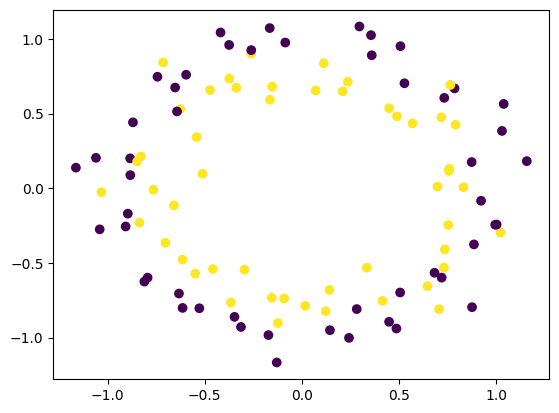

In [47]:
X1,y1=make_circles(n_samples=100,noise=.1,random_state=42)

test_loss = model.evaluate(X1, y1)
plt.scatter(X1[:,0],X1[:,1],c=y1)
print(f'Test Loss: {test_loss:.4f}')

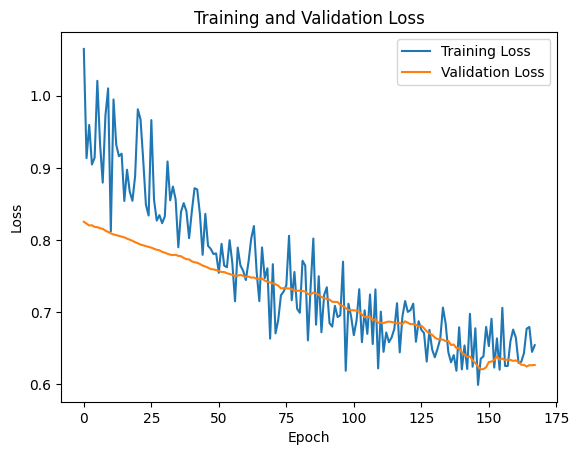

In [48]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
